In [1]:
import os
import cv2
import csv
import numpy as np
import pandas as pd
import mediapipe as mp
import matplotlib.pyplot as plt

In [2]:
# Initializing mediapipe pose class.
mp_pose = mp.solutions.pose

# Setting up the Pose function.
pose = mp_pose.Pose(
    static_image_mode=True, min_detection_confidence=0.3, model_complexity=2
)

# Initializing mediapipe drawing class, useful for annotation.
mp_drawing = mp.solutions.drawing_utils

In [3]:
def detectPose1(image, pose, display=True):
    # Create a copy of the input image.
    output_image = image.copy()

    # Convert the image from BGR into RGB format.
    imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Perform the Pose Detection.
    results = pose.process(imageRGB)

    # Initialize a list to store the detected landmarks.
    landmarks = []

    # Check if any landmarks are detected.
    if results.pose_landmarks:

        # Draw Pose landmarks on the output image.
        mp_drawing.draw_landmarks(
            image=output_image,
            landmark_list=results.pose_landmarks,
            connections=mp_pose.POSE_CONNECTIONS,
        )

        # Iterate over the detected landmarks.
        for landmark in results.pose_landmarks.landmark:

            # Append the landmark into the list.
            landmarks.append((landmark.x, landmark.y, landmark.z, landmark.visibility))

    # Check if the original input image and the resultant image are specified to be displayed.
    if display:

        # Display the original input image and the resultant image.
        plt.figure(figsize=[22, 22])
        plt.subplot(121)
        plt.imshow(image[:, :, ::-1])
        plt.title("Original Image")
        plt.axis("off")
        plt.subplot(122)
        plt.imshow(output_image[:, :, ::-1])
        plt.title("Output Image")
        plt.axis("off")

    # Otherwise
    else:

        # Return the output image and the found landmarks.
        return output_image, landmarks

In [4]:
# # Read an image from the specified path.
# sample_img = cv2.imread('DATASET/TRAIN/goddess/00000096.jpg')
# LandmarkGenerator(sample_img)

TypeError: cannot unpack non-iterable NoneType object

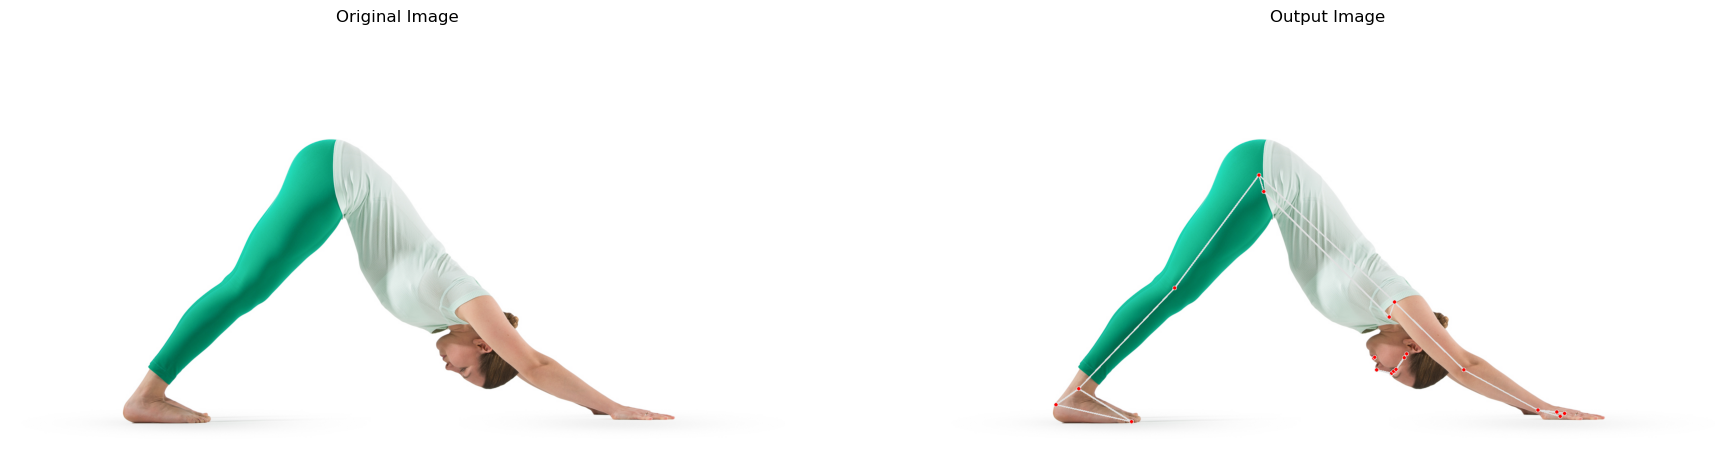

In [5]:
sample_img = cv2.imread("NEW_DATASET/downdog/00000001.JPG")
output_image, landmarks = detectPose1(sample_img, pose, display=True)

In [7]:
landmarks

[(0.5635983943939209,
  0.7796429991722107,
  -0.09568377584218979,
  0.9970114231109619),
 (0.5821760296821594,
  0.7888424396514893,
  -0.08134878426790237,
  0.9863584637641907),
 (0.5842908620834351,
  0.7862153053283691,
  -0.08176431059837341,
  0.993969202041626),
 (0.5863361954689026,
  0.783657431602478,
  -0.08177028596401215,
  0.9862480759620667),
 (0.582827091217041,
  0.7868466973304749,
  -0.13080203533172607,
  0.9917125701904297),
 (0.5854241251945496,
  0.7828943133354187,
  -0.1312708705663681,
  0.9975486397743225),
 (0.5883018374443054,
  0.7785395383834839,
  -0.13155345618724823,
  0.9954448938369751),
 (0.5988436937332153,
  0.7518828511238098,
  -0.006809636950492859,
  0.9930551648139954),
 (0.6021206974983215,
  0.7425364255905151,
  -0.23267877101898193,
  0.9952089190483093),
 (0.55998694896698,
  0.7524538636207581,
  -0.05488407611846924,
  0.9757600426673889),
 (0.561057984828949,
  0.7506569623947144,
  -0.12420453131198883,
  0.9828243255615234),
 (0.5

In [1]:
landmarks = [item for row in landmarks for item in row]

NameError: name 'landmarks' is not defined

In [9]:
len(landmarks)

132

In [10]:
landmarks

[0.5635983943939209,
 0.7796429991722107,
 -0.09568377584218979,
 0.9970114231109619,
 0.5821760296821594,
 0.7888424396514893,
 -0.08134878426790237,
 0.9863584637641907,
 0.5842908620834351,
 0.7862153053283691,
 -0.08176431059837341,
 0.993969202041626,
 0.5863361954689026,
 0.783657431602478,
 -0.08177028596401215,
 0.9862480759620667,
 0.582827091217041,
 0.7868466973304749,
 -0.13080203533172607,
 0.9917125701904297,
 0.5854241251945496,
 0.7828943133354187,
 -0.1312708705663681,
 0.9975486397743225,
 0.5883018374443054,
 0.7785395383834839,
 -0.13155345618724823,
 0.9954448938369751,
 0.5988436937332153,
 0.7518828511238098,
 -0.006809636950492859,
 0.9930551648139954,
 0.6021206974983215,
 0.7425364255905151,
 -0.23267877101898193,
 0.9952089190483093,
 0.55998694896698,
 0.7524538636207581,
 -0.05488407611846924,
 0.9757600426673889,
 0.561057984828949,
 0.7506569623947144,
 -0.12420453131198883,
 0.9828243255615234,
 0.5794839262962341,
 0.6579567193984985,
 0.088482491672039

In [11]:
import mediapipe as mp  # Import mediapipe
import cv2  # Import opencv

In [12]:
mp_drawing = mp.solutions.drawing_utils  # Drawing helpers
mp_holistic = mp.solutions.holistic  # Mediapipe Solutions

In [13]:
cap = cv2.VideoCapture(0)
# Initiate holistic model
with mp_holistic.Holistic(
    min_detection_confidence=0.5, min_tracking_confidence=0.5
) as holistic:

    while cap.isOpened():
        ret, frame = cap.read()

        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Make Detections
        results = holistic.process(image)
        # print(results.face_landmarks)

        # Recolor image back to BGR for rendering
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Pose Detections
        mp_drawing.draw_landmarks(
            image,
            results.pose_landmarks,
            mp_holistic.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2),
        )

        cv2.imshow("Raw Webcam Feed", image)

        if cv2.waitKey(10) & 0xFF == ord("q"):
            break

cap.release()
cv2.destroyAllWindows()

In [14]:
results.pose_landmarks

landmark {
  x: 0.4647035598754883
  y: 0.6715803742408752
  z: -2.668659210205078
  visibility: 0.9985765218734741
}
landmark {
  x: 0.5145617127418518
  y: 0.5830326080322266
  z: -2.697505235671997
  visibility: 0.9979655742645264
}
landmark {
  x: 0.541425347328186
  y: 0.5790111422538757
  z: -2.6966733932495117
  visibility: 0.9979596138000488
}
landmark {
  x: 0.5654027462005615
  y: 0.5724626183509827
  z: -2.6969118118286133
  visibility: 0.9974768161773682
}
landmark {
  x: 0.4238019585609436
  y: 0.5769419074058533
  z: -2.699805974960327
  visibility: 0.9983996748924255
}
landmark {
  x: 0.39537686109542847
  y: 0.5713068842887878
  z: -2.6991634368896484
  visibility: 0.9984398484230042
}
landmark {
  x: 0.37393665313720703
  y: 0.5653982758522034
  z: -2.6988539695739746
  visibility: 0.9982841610908508
}
landmark {
  x: 0.6113142371177673
  y: 0.5382640361785889
  z: -2.283923625946045
  visibility: 0.9981712102890015
}
landmark {
  x: 0.34778645634651184
  y: 0.54913103

In [15]:
num_coords = 0
for pose_landmarks in results.pose_landmarks.landmark:
    num_coords += 1

print(num_coords)

33


In [16]:
landmarks = ["class"]
for val in range(1, num_coords + 1):
    landmarks += [
        "x{}".format(val),
        "y{}".format(val),
        "z{}".format(val),
        "v{}".format(val),
    ]

In [17]:
landmarks

['class',
 'x1',
 'y1',
 'z1',
 'v1',
 'x2',
 'y2',
 'z2',
 'v2',
 'x3',
 'y3',
 'z3',
 'v3',
 'x4',
 'y4',
 'z4',
 'v4',
 'x5',
 'y5',
 'z5',
 'v5',
 'x6',
 'y6',
 'z6',
 'v6',
 'x7',
 'y7',
 'z7',
 'v7',
 'x8',
 'y8',
 'z8',
 'v8',
 'x9',
 'y9',
 'z9',
 'v9',
 'x10',
 'y10',
 'z10',
 'v10',
 'x11',
 'y11',
 'z11',
 'v11',
 'x12',
 'y12',
 'z12',
 'v12',
 'x13',
 'y13',
 'z13',
 'v13',
 'x14',
 'y14',
 'z14',
 'v14',
 'x15',
 'y15',
 'z15',
 'v15',
 'x16',
 'y16',
 'z16',
 'v16',
 'x17',
 'y17',
 'z17',
 'v17',
 'x18',
 'y18',
 'z18',
 'v18',
 'x19',
 'y19',
 'z19',
 'v19',
 'x20',
 'y20',
 'z20',
 'v20',
 'x21',
 'y21',
 'z21',
 'v21',
 'x22',
 'y22',
 'z22',
 'v22',
 'x23',
 'y23',
 'z23',
 'v23',
 'x24',
 'y24',
 'z24',
 'v24',
 'x25',
 'y25',
 'z25',
 'v25',
 'x26',
 'y26',
 'z26',
 'v26',
 'x27',
 'y27',
 'z27',
 'v27',
 'x28',
 'y28',
 'z28',
 'v28',
 'x29',
 'y29',
 'z29',
 'v29',
 'x30',
 'y30',
 'z30',
 'v30',
 'x31',
 'y31',
 'z31',
 'v31',
 'x32',
 'y32',
 'z32',
 'v32',
 '

In [18]:
with open("coords.csv", mode="w", newline="") as f:
    csv_writer = csv.writer(f, delimiter=",", quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(landmarks)

In [19]:
FOLDER_PATH = "NEW_DATASET/"

In [20]:
def imageToCSV1(path):
   
    for i in os.listdir(path):
        for image in os.listdir(path + i + "/"):
            image = cv2.imread(f"NEW_DATASET/{i}/{image}")
            output_image, landmarks = detectPose1(image, pose, display=False)
            landmarks = [item for row in landmarks for item in row]

            if landmarks:
                landmarks.insert(0, i)
                with open("coords.csv", mode="a", newline="") as f:
                    csv_writer = csv.writer(f, delimiter=",", quotechar='"', quoting=csv.QUOTE_MINIMAL)
                    csv_writer.writerow(landmarks)
   

In [21]:
imageToCSV1(FOLDER_PATH)